# Monte Carlo Simulation
Objectives:
- Standard normal distribution
- Student-t distribution

### Standard normal distribution

In [156]:
import yfinance as yf
orig = yf.download(["AAPL"], start="2020-01-01", end="2024-12-31")
orig = orig[('Adj Close')]
orig.tail()

[*********************100%%**********************]  1 of 1 completed


Date
2024-03-08    170.729996
2024-03-11    172.750000
2024-03-12    173.229996
2024-03-13    171.130005
2024-03-14    173.000000
Name: Adj Close, dtype: float64

<Axes: >

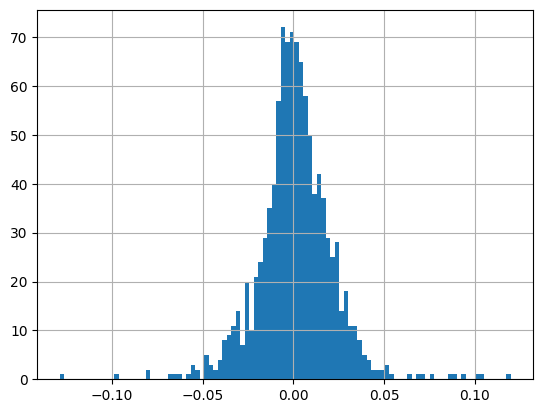

In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
returns = orig.pct_change()
last_price = orig[-1]
returns.hist(bins=100)

In [158]:
daily_volatility = returns.std()
rtn = np.random.normal(0, daily_volatility)

In [159]:
price = last_price * (1  + rtn)

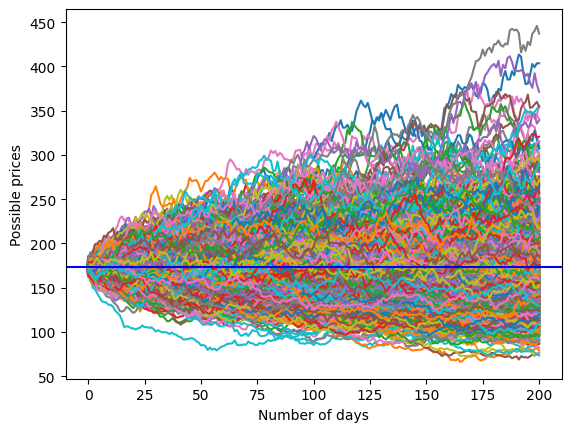

In [160]:
import warnings
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

num_simulations = 1000
num_days = 200
simulation_df = pd.DataFrame()
for x in range(num_simulations):
    count = 0
    # The first price point
    price_series = []
    rtn = np.random.normal(0, daily_volatility)
    price = last_price * (1  + rtn)
    price_series.append(price)
    # Create each price path
    for g in range(num_days):
        rtn = np.random.normal(0, daily_volatility)
        price = price_series[g] * (1  + rtn)
        price_series.append(price)
    # Save all the possible price paths
    simulation_df[x] = price_series
fig = plt.figure()
plt.plot(simulation_df)
plt.xlabel('Number of days')
plt.ylabel('Possible prices')
plt.axhline(y = last_price, color = 'b', linestyle = '-')
plt.show()

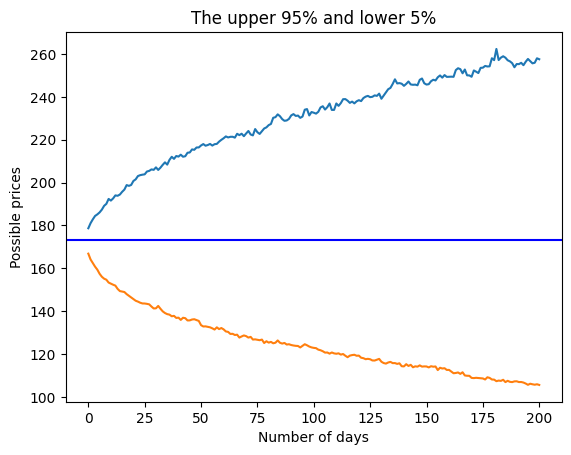

In [161]:
upper = simulation_df.quantile(.95, axis=1)
lower = simulation_df.quantile(.05, axis=1)
stock_range = pd.concat([upper, lower], axis=1)

fig = plt.figure()
plt.plot(stock_range)
plt.xlabel('Number of days')
plt.ylabel('Possible prices')
plt.title('The upper 95% and lower 5%')
plt.axhline(y = last_price, color = 'b', linestyle = '-')
plt.show()

In [162]:
simulation_df

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,171.935724,179.065561,164.813925,174.468916,172.231912,167.902784,173.683677,173.260428,172.223801,169.514520,...,168.102582,177.422082,175.417432,179.019744,171.365381,171.158500,173.405656,183.471900,171.945945,167.806036
1,171.627352,173.666979,163.430410,170.141963,175.995689,170.933648,174.265440,172.212784,169.185543,166.402343,...,170.122100,181.177264,174.901055,178.175254,170.150813,173.411575,169.346536,190.078851,176.297646,170.963572
2,168.800899,174.833830,163.868243,172.188702,172.914725,173.244822,173.177835,168.622786,171.121153,161.373172,...,169.072594,182.974254,176.952554,179.985816,177.010147,176.825789,172.740852,186.664000,175.307213,162.690337
3,169.107877,170.977534,164.074139,169.037120,173.065052,170.722509,175.183666,165.934192,173.833628,157.570121,...,167.822685,182.435710,180.483009,173.571196,179.574409,180.394822,175.049461,182.553460,180.054190,159.503048
4,160.435354,173.251686,158.842905,168.226699,181.054692,173.723949,173.211443,159.905292,168.824217,160.346247,...,172.314151,177.725696,178.912614,173.415537,178.554930,185.606398,173.363164,180.096724,183.898438,160.607745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,156.223842,132.266744,137.057539,158.030397,233.291388,179.895855,175.414980,132.583847,128.486393,245.125839,...,112.452001,137.566594,216.408369,154.338529,141.393612,188.090372,161.321225,243.866393,156.364067,134.627493
197,155.070098,126.139664,139.007383,152.872783,233.227441,181.682366,172.029595,131.813668,131.165916,241.579665,...,114.036261,140.902505,219.179880,155.590885,136.382363,187.749390,161.255408,241.991584,157.701537,136.092162
198,153.651129,126.968790,141.970778,152.977315,237.180582,180.234635,170.007144,135.239184,128.700556,236.485103,...,115.645130,141.150606,203.775377,153.927754,133.651205,180.727252,161.407527,242.246238,151.221434,132.190738
199,154.651321,123.196562,141.122339,154.392345,238.086930,174.600235,167.982176,139.127252,127.360100,236.734515,...,116.501768,141.706462,203.948722,155.682523,134.861737,188.929514,160.738341,247.163072,149.431150,130.594889


### Student-t distribution

In [163]:
returns = orig.pct_change()

In [164]:
returns[1::] # Drop the first element, which is "NA"

Date
2020-01-03   -0.009722
2020-01-06    0.007968
2020-01-07   -0.004703
2020-01-08    0.016086
2020-01-09    0.021241
                ...   
2024-03-08    0.010237
2024-03-11    0.011832
2024-03-12    0.002779
2024-03-13   -0.012123
2024-03-14    0.010927
Name: Adj Close, Length: 1056, dtype: float64

In [170]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Number of samples per simulation
num_samples = 100

# distribution fitting
returns = returns[1::] # Drop the first element, which is "NA"
params = t.fit(returns[1::]) # fit with a student-t

# Generate random numbers from Student's t-distribution
results = t.rvs(df=params[0], loc=params[1], scale=params[2], size=1000)
print('degree of freedom = ', params[0])
print('loc = ', params[1])
print('scale = ', params[2])


degree of freedom =  3.7355742800212908
loc =  0.0010793005091124007
scale =  0.014499918477992795


In [ ]:

returns.hist(bins=100,density=True, alpha=0.6, color='b', label='Actual returns distribution')

# Plot histogram of results
plt.hist(results, bins=100, density=True, alpha=0.6, color='g', label='Simulated Student/t distribution')

plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Actual returns vs. Projections with a Student\'s t-distribution')
plt.legend(loc='center left')
plt.grid(True)
plt.show()

In [166]:
t.rvs(df=params[0], loc=params[1], scale=params[2], size=1)

array([0.00217934])

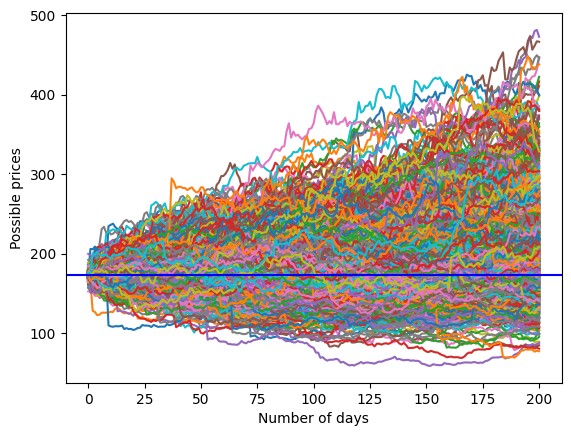

In [167]:
import warnings
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

num_simulations = 1000
num_days = 200
simulation_student_t = pd.DataFrame()
for x in range(num_simulations):
    count = 0
    # The first price point
    price_series = []
    rtn = t.rvs(df=params[0], loc=params[1], scale=params[2], size=1)[0]
    price = last_price * (1  + rtn)
    price_series.append(price)
    # Create each price path
    for g in range(num_days):
        rtn = t.rvs(df=params[0], loc=params[1], scale=params[2], size=1)[0]
        price = price_series[g] * (1  + rtn)
        price_series.append(price)
    # Save all the possible price paths
    simulation_student_t[x] = price_series
fig = plt.figure()
plt.plot(simulation_student_t)
plt.xlabel('Number of days')
plt.ylabel('Possible prices')
plt.axhline(y = last_price, color = 'b', linestyle = '-')
plt.show()

In [168]:
simulation_student_t

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,178.162328,178.000504,171.312712,171.819429,170.888390,173.469628,171.862723,174.636614,174.261881,176.365916,...,175.270466,171.929762,175.156239,172.682927,171.586345,172.928650,176.193700,175.113596,176.376446,175.340804
1,177.324506,176.530189,195.583769,170.152535,165.963088,171.632999,173.285481,180.358886,180.041759,177.555272,...,176.842448,166.236165,174.657635,175.690691,176.836116,175.646865,179.385272,174.250666,175.198754,176.518561
2,179.578837,177.261340,190.126833,168.121328,164.345743,171.940374,173.626672,182.043061,189.162459,179.685931,...,177.161217,167.998487,172.331808,175.563737,176.609329,178.604850,179.647863,177.990498,175.218700,200.576107
3,178.653819,176.913321,190.152004,169.574254,163.756688,170.542377,173.039786,181.007479,190.728399,179.392614,...,174.626040,172.381085,173.608045,176.159993,178.429384,175.084526,177.237060,175.783704,178.317071,198.693299
4,179.113143,172.540355,195.191458,172.341223,164.593854,169.145993,185.474499,183.709991,195.076207,181.444924,...,173.186922,169.530626,178.291838,178.693341,178.982794,175.570505,178.451794,176.692321,177.487156,202.458100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,179.336853,154.432075,161.793549,168.450197,234.599910,208.805669,418.669853,201.813024,199.211941,201.174983,...,276.219406,273.675497,167.701790,190.983670,182.300973,146.133631,142.400155,166.457039,194.526690,275.682849
197,178.552461,156.229955,161.753862,168.534948,233.929161,209.071297,422.802155,203.893575,202.082456,199.323294,...,277.911419,277.188828,167.874096,191.256159,178.438792,142.807613,139.849123,163.275241,197.519811,275.985733
198,179.364839,154.640223,161.581514,167.280037,234.715304,210.575407,423.571256,204.392405,211.717267,202.896252,...,275.793968,276.081343,163.781932,196.144461,179.304359,140.246357,140.536898,162.905826,206.704136,284.209266
199,181.610972,157.870774,157.734563,168.743913,230.551664,225.936126,431.207099,202.960878,212.095640,195.237051,...,278.529035,271.408290,164.044504,197.707866,181.189660,138.814799,143.105362,162.260933,205.820809,285.260079


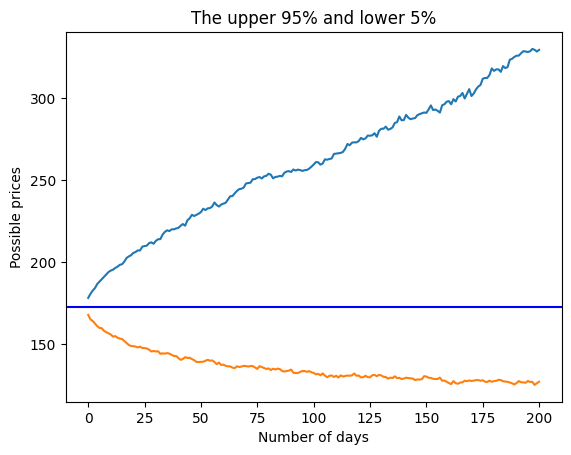

In [169]:
upper = simulation_student_t.quantile(.95, axis=1)
lower = simulation_student_t.quantile(.05, axis=1)
stock_range = pd.concat([upper, lower], axis=1)

fig = plt.figure()
plt.plot(stock_range)
plt.xlabel('Number of days')
plt.ylabel('Possible prices')
plt.title('The upper 95% and lower 5%')
plt.axhline(y = last_price, color = 'b', linestyle = '-')
plt.show()